In [5]:
import np_obb
import skimage.io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Oriented bounding box from points

in this case we need to pass in `calcconvexhull = False` as `scipy.spatial` throws an error when trying to calculate the convex hull from three points.

In [6]:
np_obb.get_obb_from_points(np.array([[10,10],[20,20],[5,5]]), calcconvexhull=False)

(array([[ 5.,  5.],
        [20., 20.],
        [20., 20.],
        [ 5.,  5.],
        [ 5.,  5.]]), array([12.5, 12.5]))

# Oriented bounding box from mask image

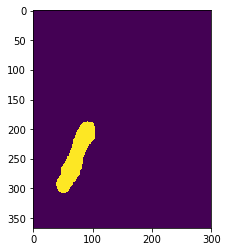

In [13]:
labels = skimage.io.imread("cells.tif")
# create a mask image from one label
mask = labels == 1
plt.imshow(mask)

In [16]:
corners, centre = np_obb.get_obb_from_mask(mask)
print("Corners:" , corners)
print("Centre:", centre)

Corners: [[181.1188009   83.1158786 ]
 [300.46119506  32.56342659]
 [313.265387    62.79109826]
 [193.92299285 113.34355028]
 [181.1188009   83.1158786 ]]
Centre: [247.19209395  72.95348843]


# Oriented bounding boxes for labelled connected components image

In [17]:
obbs = np_obb.get_obb_from_labelim(labels)

In [18]:
obbs

{1: (array([[181.1188009 ,  83.1158786 ],
         [300.46119506,  32.56342659],
         [313.265387  ,  62.79109826],
         [193.92299285, 113.34355028],
         [181.1188009 ,  83.1158786 ]]), array([247.19209395,  72.95348843])),
 2: (array([[134.80803408,  98.86152194],
         [207.08827751, 110.05129136],
         [202.32049466, 140.84875392],
         [130.04025124, 129.6589845 ],
         [134.80803408,  98.86152194]]), array([168.56426437, 119.85513793])),
 3: (array([[206.42289131, 105.32822721],
         [269.78921089, 119.71475022],
         [263.26294625, 148.46008159],
         [199.89662666, 134.07355858],
         [206.42289131, 105.32822721]]), array([234.84291878, 126.8941544 ])),
 4: (array([[120.38472594, 134.35005072],
         [222.8867658 , 144.03863265],
         [220.38758832, 170.47911605],
         [117.88554846, 160.79053412],
         [120.38472594, 134.35005072]]), array([170.38615713, 152.41458339])),
 5: (array([[ 53.47785767, 218.10041084],
      

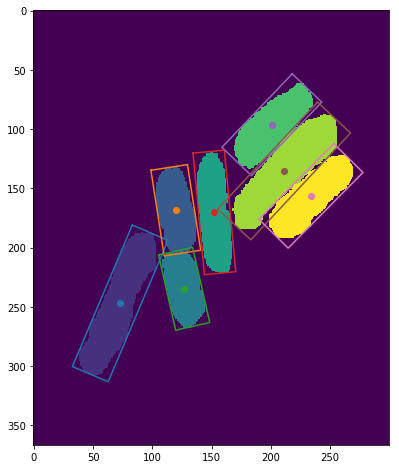

In [32]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.imshow(labels)
for i in obbs.keys():
    corners, centre = obbs[i]
    ax.scatter(centre[1],centre[0])    
    ax.plot(corners[:,1],corners[:,0],'-')
plt.show()